In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow.keras.backend import clear_session, sigmoid
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation, Dense, Dropout
from keras.models import Sequential

In [2]:
def plot_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    # plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [3]:
import pandas as pd 

In [4]:
SEED = 1

dim = 600
# base_vetorizada = "base_vetorizada"
base_vetorizada = "s3_base_vetorizada_600"

pasta = "bases_treino_teste"
arquivo1 = "tratado_links_folha_rotulados_base_estigma_resgatados.csv"
arquivo2 = "tratado_links_estadao_rotulados_base_estigma_resgatados.csv"
arquivo3 = "tratado_links_estadao_rotulados_resgatados.csv"

In [5]:
tf.keras.utils.set_random_seed(5)

In [6]:
df1 = pd.read_csv(f"{base_vetorizada}/{pasta}/{arquivo1}")
df2 = pd.read_csv(f"{base_vetorizada}/{pasta}/{arquivo2}")
df3 = pd.read_csv(f"{base_vetorizada}/{pasta}/{arquivo3}")

In [7]:
df1.metaforico.value_counts()

0    1032
1     309
Name: metaforico, dtype: int64

In [8]:
df2.metaforico.value_counts()

1    173
0     22
Name: metaforico, dtype: int64

In [9]:
df3.metaforico.value_counts()

0    64
1    29
Name: metaforico, dtype: int64

In [10]:
1341 + 288

1629

In [11]:
vetor1 = np.load(f"{base_vetorizada}/{pasta}/{arquivo1}.npy")
vetor2 = np.load(f"{base_vetorizada}/{pasta}/{arquivo2}.npy")
vetor3 = np.load(f"{base_vetorizada}/{pasta}/{arquivo3}.npy")

In [12]:
df3.shape

(93, 7)

In [13]:
df_y = pd.concat([
    df1[["metaforico"]],
    df2[["metaforico"]]
    # df3[["metaforico"]]
], axis = 0)

df_y.shape

(1536, 1)

In [14]:
df2.head()

,Jornal,Link,metaforico,paragrafos_resgatados,texto_completo,paragrafos_tratados_sw,paragrafos_tratados_sw_vetorizados
0,Estadão,https://politica.estadao.com.br/noticias/eleic...,1,"['Sem querer descartar qualquer apoio, Álvaro ...",['Álvaro Dias descarta possibilidade de alianç...,querer descartar álvaro dias disse considerado...,[[ 3.36895106e+00 -1.33067979e-01 5.79284027e...
1,Estadão,https://politica.estadao.com.br/noticias/eleic...,1,"['O futuro de Ciro Gomes está atrelado ao PT, ...","['Eleição vai ter de afunilar, apesar dos temo...",futuro ciro gomes atrelado pt cismou colocar o...,[[ 3.53176697 0.45472605 2.26785599 -0.35011...
2,Estadão,https://economia.estadao.com.br/noticias/geral...,1,['Entre as companhias que lidam com o poder pú...,['Empresas querem se blindar de punições e dif...,companhias lidam público lava jato criou espéc...,[[ 4.13754800e+00 8.84323981e-01 3.12363504e...
3,Estadão,https://internacional.estadao.com.br/blogs/fat...,1,"['Política e Futebol, as artimanhas para se ma...","['Política e Futebol, as artimanhas para se ma...",política futebol artimanhas manter rotineira e...,[[ 2.99120015e-01 1.48204992e-01 3.36301014e...
4,Estadão,https://internacional.estadao.com.br/blogs/fat...,1,"['Política e Futebol, as artimanhas para se ma...","['Política e Futebol, as artimanhas para se ma...",política futebol artimanhas manter rotineira e...,[[ 2.16530016e-01 1.24603992e-01 4.53098014e...


In [15]:
# vetor_x = np.concatenate((vetor1, vetor2, vetor3), axis = 0)
vetor_x = np.concatenate((vetor1, vetor2), axis = 0)
vetor_x.shape

(1536, 600)

In [16]:
X = vetor_x 
y = df_y["metaforico"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = SEED)

In [18]:
print("Dados de treino = ", X_train.shape)
print("Dados de teste = ", X_test.shape)

Dados de treino =  (1228, 600)
Dados de teste =  (308, 600)


In [19]:
print("Proporção de y de treino")
print(y_train.value_counts(normalize = True))

print("\nProporção de y de teste")
print(y_test.value_counts(normalize = True))

Proporção de y de treino
0    0.686482
1    0.313518
Name: metaforico, dtype: float64

Proporção de y de teste
0    0.685065
1    0.314935
Name: metaforico, dtype: float64


In [20]:
tf.keras.backend.clear_session()

In [21]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

In [22]:
opt = SGD(learning_rate = 0.001, nesterov = True)

# # def swish(x, beta = 1):
# #     return (x * sigmoid(beta * x))
# # get_custom_objects().update({'swish': Activation(swish)})  

# class Swish(Activation):
#     def __init__(self, activation, **kwargs):
#         super(Swish, self).__init__(activation, **kwargs)
#         self.__name__ = 'swish'
        
# def swish(x):
#     return (sigmoid(x) * x)
# get_custom_objects().update({'swish': Swish(swish)})

In [23]:
model_cbow = Sequential()
model_cbow.add(Dense(512, input_dim=dim, activation='swish'))
model_cbow.add(Dropout(0.2))
model_cbow.add(Dense(256, activation='swish'))
model_cbow.add(Dropout(0.2))
model_cbow.add(Dense(128, activation='swish'))
model_cbow.add(Dropout(0.2))
model_cbow.add(Dense(64, activation='swish'))
model_cbow.add(Dense(1, activation='sigmoid'))
model_cbow.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_cbow.summary()

# model_cbow = Sequential()
# model_cbow.add(Dense(1024, input_dim=dim, activation='swish'))
# model_cbow.add(Dropout(0.2))
# model_cbow.add(Dense(1024, activation='swish'))
# model_cbow.add(Dropout(0.2))
# model_cbow.add(Dense(512, activation='swish'))
# model_cbow.add(Dropout(0.2))
# model_cbow.add(Dense(256, activation='swish'))
# model_cbow.add(Dropout(0.1))
# model_cbow.add(Dense(64, activation='swish'))
# model_cbow.add(Dense(1, activation='sigmoid'))
# model_cbow.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
# model_cbow.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               307712    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [24]:
history_cbow = model_cbow.fit(X_train, y_train, 
                              epochs=100, 
                              validation_data=(X_test, y_test), 
                              batch_size=10,
                              callbacks = [callback])

Epoch 1/100
123/123 [==============================] - 2s 6ms/step - loss: 0.7403 - accuracy: 0.6547 - val_loss: 0.6223 - val_accuracy: 0.7922
Epoch 2/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.7321 - val_loss: 0.5799 - val_accuracy: 0.7792
Epoch 3/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6076 - accuracy: 0.7419 - val_loss: 0.5533 - val_accuracy: 0.7370
Epoch 4/100
123/123 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.7622 - val_loss: 0.5172 - val_accuracy: 0.7597
Epoch 5/100
123/123 [==============================] - 0s 4ms/step - loss: 0.5373 - accuracy: 0.7704 - val_loss: 0.4894 - val_accuracy: 0.7955
Epoch 6/100
123/123 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.7818 - val_loss: 0.4706 - val_accuracy: 0.8019
Epoch 7/100
123/123 [==============================] - 1s 4ms/step - loss: 0.4669 - accuracy: 0.7980 - val_loss: 0.4355 - val_accuracy: 0.8149

In [25]:
loss_cbow, accuracy_cbow = model_cbow.evaluate(X_test, y_test, verbose=False)
print("perda (erro) = ", loss_cbow)
print()
print("Acurácia = ",  accuracy_cbow)

perda (erro) =  0.22460801899433136

Acurácia =  0.9383116960525513


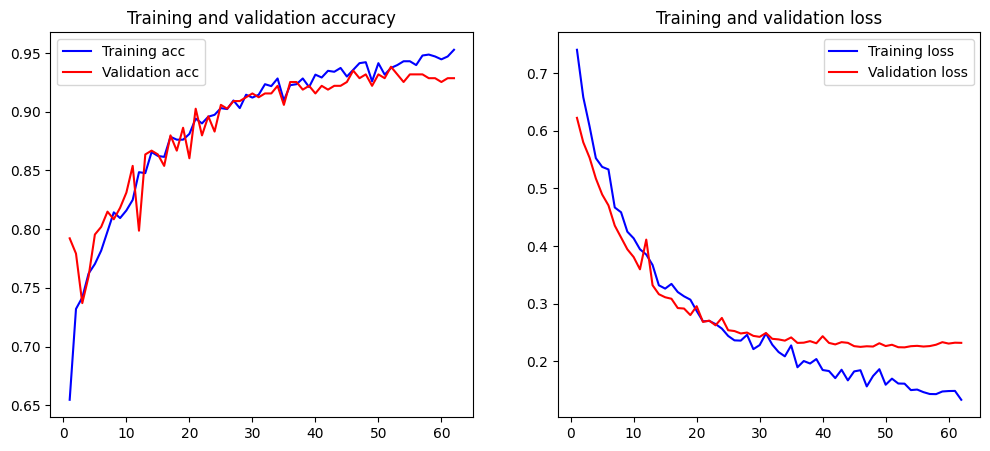

In [26]:
plot_history(history_cbow)

In [27]:
y_predict = (model_cbow.predict(X_test) > 0.5).astype("int32")

10/10 [==============================] - 0s 2ms/step


In [28]:
y_pred = [x[0] for x in y_predict]

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       211
           1       0.94      0.86      0.90        97

    accuracy                           0.94       308
   macro avg       0.94      0.92      0.93       308
weighted avg       0.94      0.94      0.94       308



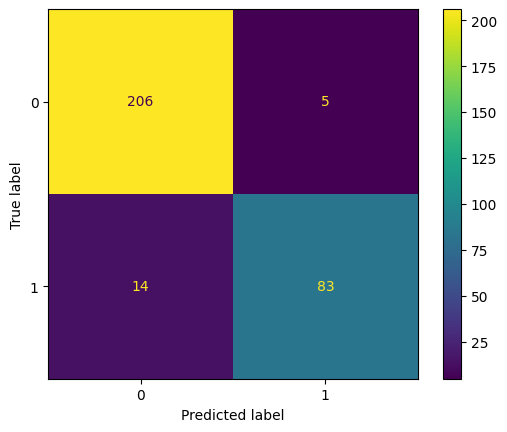

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Validação do modelo 

In [31]:
df3.head()

,link,metaforico,indice_noticia,paragrafos_resgatados,texto_completo,paragrafos_tratados_sw,paragrafos_tratados_sw_vetorizados
0,https://opiniao.estadao.com.br/noticias/espaco...,1,2,['A esquizofrenia se faz presente no governo: ...,['Mais poder para quê? Para confrontos e mobil...,esquizofrenia presente governo caudatário cent...,[[ 3.10971797 -1.09312899 2.69877705 -3.15451...
1,https://cultura.estadao.com.br/noticias/litera...,1,3,"['""Durante meus dois anos\xa0em Berkeley, não\...","['Em novo livro, Simon Schwartzman articula me...",durante anos berkeley conheci americano sequer...,[[ 5.54485902e+00 3.73239404e+00 1.59974998e...
2,"https://cultura.estadao.com.br/noticias/geral,...",1,4,"['Considere uma fotografia. Nela, você vê meni...",['Iniciamos a vacinação dentro de um campo pol...,considere fotografia nela vê meninos jovens id...,[[ 1.56779540e+01 8.54590302e+00 1.24404740e...
3,https://cultura.estadao.com.br/noticias/cinema...,1,5,"[', mas você não o descartaria do universo dos...",['A produção mais recente de Billy Madison pod...,descartaria universo irmãos safdie oscilações ...,[[ 0.92739603 0.70576598 1.63334798 0.91279...
4,https://cultura.estadao.com.br/blogs/direto-da...,1,6,"[""Bom, acho que não dá pra responder essa perg...","[""'Não idealizo nem romantizo maternidade', di...",acho pra responder pergunta entender estamos j...,[[ 2.00851702e+00 1.58086201e+00 -1.43751000e...


In [32]:
print("Dados de validação:")
print(df3.metaforico.value_counts(dropna = False))
print(" ")
print("Dados de validação em percentual: ")
print(df3.metaforico.value_counts(dropna = False, normalize = True))

Dados de validação:
0    64
1    29
Name: metaforico, dtype: int64
 
Dados de validação em percentual: 
0    0.688172
1    0.311828
Name: metaforico, dtype: float64


In [33]:
X_val = vetor3
y_val = df3[["metaforico"]]

In [34]:
y_predict_val = (model_cbow.predict(X_val) > 0.5).astype("int32")

3/3 [==============================] - 0s 2ms/step


In [35]:
y_pred_val = [x[0] for x in y_predict_val]

In [36]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        64
           1       0.86      0.86      0.86        29

    accuracy                           0.91        93
   macro avg       0.90      0.90      0.90        93
weighted avg       0.91      0.91      0.91        93



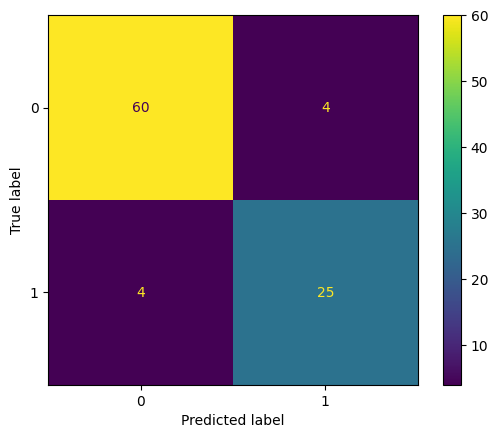

In [37]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [553]:
# print("erro proposital)

In [554]:
# model_cbow.save("modelo_base_filmes")

In [555]:
# import pandas as pd 
# from tensorflow import keras 

# model_cbow = keras.models.load_model("modelo_base_filmes")

# Aplicação do modelo para realizar previsões:

In [60]:
base_vetorizada = "s3_base_vetorizada_600"

# pasta_entrada = "bases_aplicacao"
# pasta_entrada = "pasta_09_2023"
pasta_entrada = "pasta_04_2024"

pasta_saida = "analises_de_resultados/pasta_04_2024"

# arquivo1 = "tratado_links_correio_do_povo_organizado_paragrafos_resgatados.csv"
# arquivo2 = "tratado_links_estadao_resgatados.csv"
# arquivo3 = "tratado_links_folha_sem_rotulo_resgatados.csv"

# arquivo1 = "tratado_links_folha_09_2023.csv_completo_resgatado.csv"
# arquivo2 = "tratado_links_estadao_09_2023.csv_completo_resgatado.csv"
# arquivo3 = "tratado_links_correio_09_2023.csv_completo_resgatado.csv"

# arquivo1 = "tratado_links_correio_04_2024.csv_completo_resgatado.csv"
# arquivo1 = "tratado_links_estadao_04_2024.csv_completo_resgatado.csv"
arquivo1 = "tratado_links_folha_04_2024.csv_completo_resgatado.csv"

In [61]:
# # Seleciono o arquivo
arquivo = arquivo1

# # Leio e imprimo o tamanho
dt = pd.read_csv(f"{base_vetorizada}/{pasta_entrada}/{arquivo}")
print("tamanho = ", dt.shape)

# Leio o texto vetorizado
Xapp = np.load(f"{base_vetorizada}/{pasta_entrada}/{arquivo}.npy")

# Faço a predição da probabilidade
y_pred = model_cbow.predict(Xapp)

# Faço a predição
y_predict_app = (y_pred > 0.5).astype("int32")

# Formato a predição
y_pred_app = [x[0] for x in y_predict_app]

y_pred_prob = [x[0] for x in y_pred]

# Registro na base de dados
dt["metaforico_pred"] = y_pred_app
dt["metaforico_pred_prob"] = y_pred_prob
dt.to_csv(f"{pasta_saida.split('/')[0]}/base_aplicacao_resultado/rotulado_{arquivo}")
dt.to_csv(f"{pasta_saida}/rotulado_{arquivo}")
dt[["links","paragrafos_resgatados","texto_completo","paragrafos_tratados_sw","metaforico_pred", "metaforico_pred_prob"]].to_excel(f"{pasta_saida}/resultado_rotulado_{arquivo}.xlsx", encoding = "utf-8")

tamanho =  (112, 6)
4/4 [==============================] - 0s 2ms/step


c:\Users\r-omd\.conda\envs\tf-venv39\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [52]:
dt["metaforico_pred"].value_counts(dropna = False)

0    103
1      9
Name: metaforico_pred, dtype: int64

In [53]:
dt["metaforico_pred"].value_counts(dropna = False, normalize = True)

0    0.919643
1    0.080357
Name: metaforico_pred, dtype: float64